In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

Regressão do tempo de trânsito através da regressão Ridge. Necessário fazer a escolha do fator de amortecimento para reduzir a sensibilidade das predições e mitigar o efeito de outlayers (pontos expúrios). 

In [2]:
dataset = pd.read_csv(r'C:/Users/mathe/Desktop/MATHEUS/UFBA/IC/shalegas-rad/dataset_no_blind.csv', index_col=0)
blind_test = pd.read_csv(r'C:/Users/mathe/Desktop/MATHEUS/UFBA/IC/shalegas-rad/blind_data.csv')

In [3]:
dataset.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [4]:
dataset.reset_index(drop=True, inplace=True)

In [5]:
blind_test['ILD'] = blind_test['ILD_log10'].copy()
blind_test.ILD.loc[blind_test.ILD > 0] = 10**(blind_test.ILD.loc[blind_test.ILD > 0]) 

In [7]:
#Acessando o objeto salvo com as 4 layers contendo os indices para acessar no dataset e treinar o algoritmo
with open("kfolds_list","rb") as f:
    k_folds_index= pickle.load(f)

### k_folds_index[treino (0-3) ]   [teste (0-3) ]   [amostra (0-7875) ]

In [6]:
scaler = StandardScaler()
scaler.fit(dataset[['GR','RHOB','ILD_log10','NPHI']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
cv1 = KFold(n_splits=4, shuffle=True, random_state=42)

In [13]:
RidReg = Ridge()
params={'alpha':[0.0001,0.005,0.001,0.05,0.01,0.5,0.1,1,5,10,50,100]}
ridge_regressor = GridSearchCV(RidReg,params,scoring='neg_mean_squared_error', cv=cv1, return_train_score=True)
ridge_regressor.fit(scaler.transform(dataset[['GR','RHOB','ILD_log10','NPHI']]),dataset.DT)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1,
                                   1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [14]:
print(ridge_regressor.best_estimator_)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
{'alpha': 10}
-26.543165036717728


In [15]:
df = pd.DataFrame(ridge_regressor.cv_results_)
df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
9,0.003748,4.338776e-04,0.001000,1.585976e-06,10,{'alpha': 10},-27.289933,-27.750964,-25.347487,-25.784276,-26.543165,1.002746,1,-26.225146,-26.070143,-26.862363,-26.727501,-26.471288,0.331696
8,0.004248,1.089714e-03,0.000999,7.974558e-07,5,{'alpha': 5},-27.290998,-27.750969,-25.347142,-25.783790,-26.543225,1.003141,2,-26.225081,-26.070082,-26.862300,-26.727438,-26.471225,0.331695
7,0.003248,4.330157e-04,0.000999,8.344650e-07,1,{'alpha': 1},-27.291886,-27.750998,-25.346896,-25.783433,-26.543303,1.003456,3,-26.225060,-26.070063,-26.862280,-26.727417,-26.471205,0.331695
5,0.004997,1.223586e-03,0.001000,6.529362e-07,0.5,{'alpha': 0.5},-27.291999,-27.751003,-25.346867,-25.783390,-26.543315,1.003495,4,-26.225059,-26.070062,-26.862280,-26.727416,-26.471204,0.331695
6,0.002999,3.097148e-07,0.001000,5.196212e-07,0.1,{'alpha': 0.1},-27.292090,-27.751007,-25.346844,-25.783357,-26.543325,1.003527,5,-26.225059,-26.070062,-26.862279,-26.727416,-26.471204,0.331695
3,0.003748,8.295095e-04,0.000999,1.976862e-07,0.05,{'alpha': 0.05},-27.292101,-27.751008,-25.346841,-25.783353,-26.543326,1.003531,6,-26.225059,-26.070062,-26.862279,-26.727416,-26.471204,0.331695
4,0.003748,4.325351e-04,0.002249,2.276573e-03,0.01,{'alpha': 0.01},-27.292110,-27.751009,-25.346839,-25.783349,-26.543327,1.003534,7,-26.225059,-26.070062,-26.862279,-26.727416,-26.471204,0.331695
1,0.003748,4.339109e-04,0.001499,8.648616e-04,0.005,{'alpha': 0.005},-27.292112,-27.751009,-25.346838,-25.783349,-26.543327,1.003534,8,-26.225059,-26.070062,-26.862279,-26.727416,-26.471204,0.331695
2,0.003498,4.995467e-04,0.001000,6.165552e-07,0.001,{'alpha': 0.001},-27.292113,-27.751009,-25.346838,-25.783348,-26.543327,1.003535,9,-26.225059,-26.070062,-26.862279,-26.727416,-26.471204,0.331695
0,0.011244,7.079042e-03,0.000999,8.820682e-07,0.0001,{'alpha': 0.0001},-27.292113,-27.751009,-25.346838,-25.783348,-26.543327,1.003535,10,-26.225059,-26.070062,-26.862279,-26.727416,-26.471204,0.331695


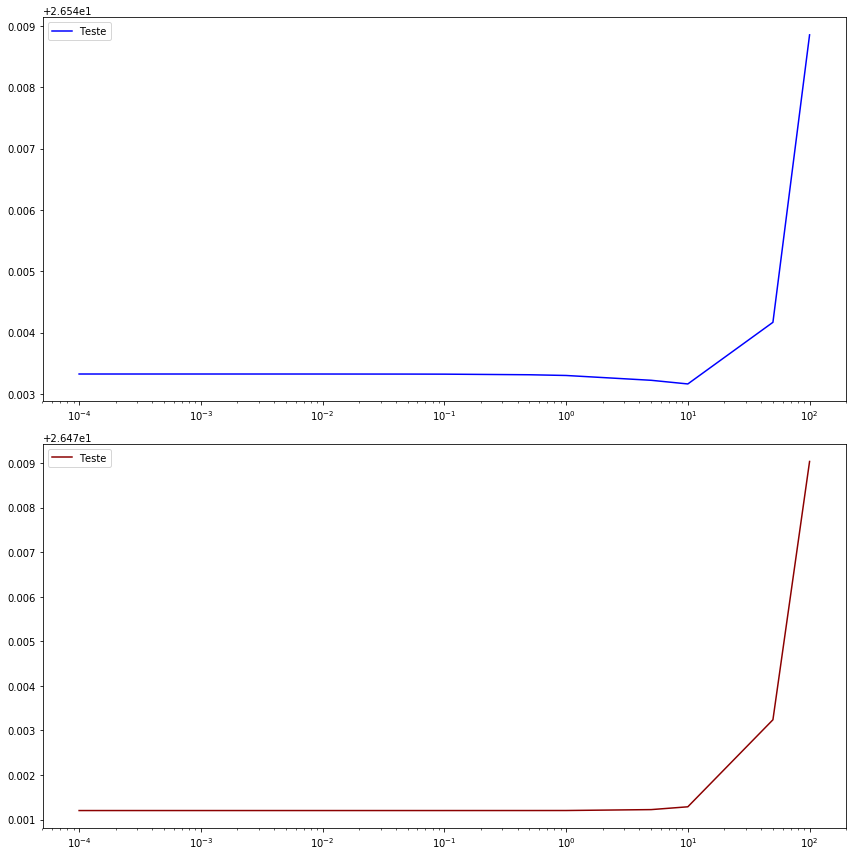

In [17]:
fig, axes = plt.subplots(2, figsize=(12,12))
axes[0].semilogx(df.sort_values(by='param_alpha').param_alpha, 
             -(df.sort_values(by='param_alpha').mean_test_score), 
             c='blue', label='Teste')
axes[1].semilogx(df.sort_values(by='param_alpha').param_alpha, 
             -(df.sort_values(by='param_alpha').mean_train_score), 
             c='darkred', label='Teste')

for ax in axes:
    ax.legend()

# plt.figure(figsize=(12,6))
# plt.semilogx(df.sort_values(by='param_alpha').param_alpha, 
#              -(df.sort_values(by='param_alpha').mean_test_score), 
#              c='blue', label='Teste')
# plt.semilogx(df.sort_values(by='param_alpha').param_alpha, 
#              -(df.sort_values(by='param_alpha').mean_train_score), 
#              c='darkred', label='Treino')
# plt.xlabel('$alpha$')
# plt.ylabel('MSE')

plt.tight_layout()
plt.legend()

In [14]:
x_blindscale = scaler.transform(blind_test[['GR','RHOB','ILD_log10','NPHI']])

In [15]:
blind_test['DT_Ridge'] = ridge_regressor.predict(x_blindscale)

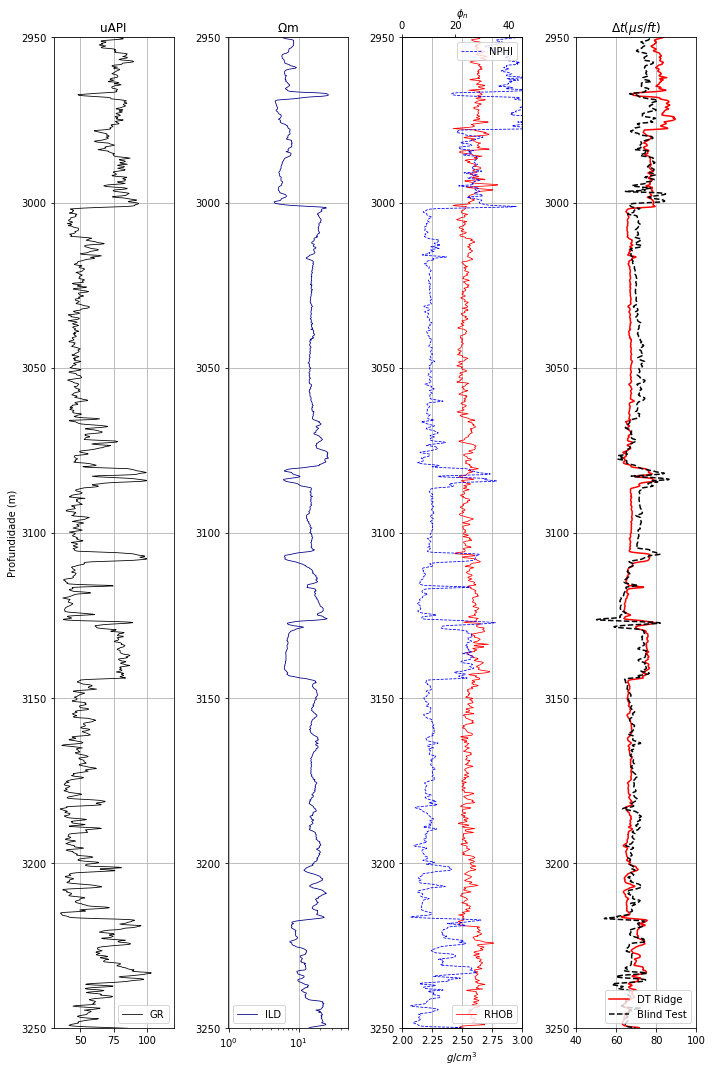

In [16]:
fig, axes = plt.subplots(ncols=4, figsize=(10,15))
axes2 = axes[2].twiny()

axes[0].plot(blind_test.GR, blind_test.DEPT, c='black', label='GR', lw=0.8)
axes[0].set_xlim(30,120)

axes[1].semilogx(blind_test.ILD,blind_test.DEPT, c = 'darkblue', lw=0.8, label='ILD')
axes[1].set_xlim(0,50)

axes[2].plot(blind_test.RHOB, blind_test.DEPT, c = 'red', label='RHOB', lw = 0.8)
axes[2].set_xlim(2,3)

axes2.plot(blind_test.NPHI, blind_test.DEPT, c = 'blue', label = 'NPHI', lw = 0.8, ls='--')
axes2.set_xlim(0,45)
axes2.legend(loc='upper right')
axes2.invert_yaxis()

axes[3].plot(blind_test.DT_Ridge.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values, 
             blind_test.DEPT.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values,
             c='red', label='DT Ridge')

axes[3].plot(blind_test.DT.loc[(blind_test.DT > 0)].values, 
           blind_test.DEPT.loc[(blind_test.DT > 0)].values, c='black', label='Blind Test', ls='--')
axes[3].set_xlim(40,100)

axes[0].set_title('uAPI')
axes[1].set_title('$\Omega$m')
axes2.set_xlabel('$\phi_n$')
axes[2].set_xlabel('$g/cm^3$')
axes[3].set_title('$\Delta t  (\mu s/ft )$')
axes[0].set_ylabel('Profundidade (m)')


for ax in axes:
    ax.set_ylim(2950,3250)
    ax.invert_yaxis()
    ax.grid()
    ax.legend()
    
axes[2].legend(loc='lower right')
axes[3].legend(loc='lower right')

fig.tight_layout()

In [52]:
blind_test.to_csv(r'C:/Users/mathe/Desktop/MATHEUS/UFBA/IC/shalegas-rad/blind_data.csv')

In [8]:
#Algoritmo para seleção da constante de amortecimento alpha para cada uma das folds
geral_mse_train = []
geral_mse_test = []
mse_train = []
mse_test = []
##################################### Aplicação da regressão para cada alpha entre 1 e 200 ############# 
for alfa in range(1,200,1):
    ################################ Aplicação da regressão em cada uma das layers######################
    for i in range(len(k_folds_index)):
        x_train = scaler.transform(dataset.loc[(k_folds_index[i][0])][['GR','RHOB','ILD_log10','NPHI']])
        x_test =  scaler.transform(dataset.loc[(k_folds_index[i][1])][['GR','RHOB','ILD_log10','NPHI']])

        y_train = dataset.loc[(k_folds_index[i][0])]['DT']
        y_test = dataset.loc[(k_folds_index[i][1])]['DT']

        RidReg = Ridge(alpha=alfa)
        RidReg.fit(x_train,y_train)
        mse_train.append(mean_squared_error(y_train,RidReg.predict(x_train)))
        mse_test.append(mean_squared_error(y_test,RidReg.predict(x_test)))
    ####################################################################################################
    geral_mse_train.append(mse_train)
    geral_mse_test.append(mse_test)
    mse_train = []
    mse_test = []
########################################################################################################

In [9]:
soma_f0_test = 0
soma_f1_test = 0
soma_f2_test = 0
soma_f3_test = 0
soma_f0_train = 0
soma_f1_train = 0
soma_f2_train = 0
soma_f3_train = 0

for i in range(len(geral_mse_test)):
    soma_f0_test += geral_mse_test[i][0]
    soma_f1_test += geral_mse_test[i][1]
    soma_f2_test += geral_mse_test[i][2]
    soma_f3_test += geral_mse_test[i][3]

    soma_f0_train += geral_mse_train[i][0]
    soma_f1_train += geral_mse_train[i][1]
    soma_f2_train += geral_mse_train[i][2]
    soma_f3_train += geral_mse_train[i][3]
    
media_f0_test = soma_f0_test/len(geral_mse_test)
media_f1_test = soma_f1_test/len(geral_mse_test)
media_f2_test = soma_f2_test/len(geral_mse_test)
media_f3_test = soma_f3_test/len(geral_mse_test)
media_f0_train = soma_f0_train/len(geral_mse_test)
media_f1_train = soma_f1_train/len(geral_mse_test)
media_f2_train = soma_f2_train/len(geral_mse_test)
media_f3_train = soma_f3_train/len(geral_mse_test)


In [10]:
media_mse_test = []
media_mse_train = []
media_mse_test.append(media_f0_test)
media_mse_test.append(media_f1_test)
media_mse_test.append(media_f2_test)
media_mse_test.append(media_f3_test)
media_mse_train.append(media_f0_train)
media_mse_train.append(media_f1_train)
media_mse_train.append(media_f2_train)
media_mse_train.append(media_f3_train)

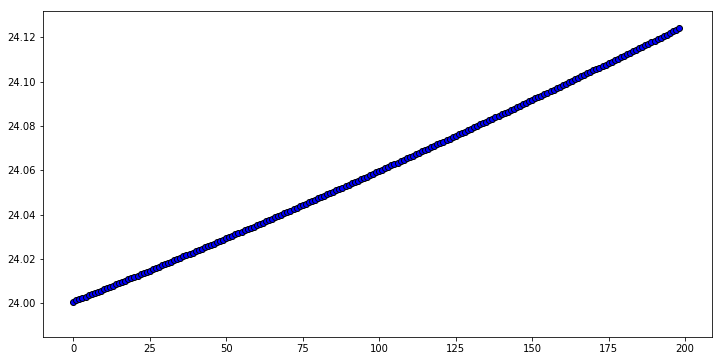

In [16]:
plt.figure(figsize=(12,6))
for i in range(len(geral_mse_test)):
    plt.scatter(i,np.asarray(geral_mse_test[i][2]),edgecolor='black', c='blue', label='Teste')
    #plt.scatter(i,np.asarray(geral_mse_train[i][2]),edgecolor='black', c='yellow', label='Treino')

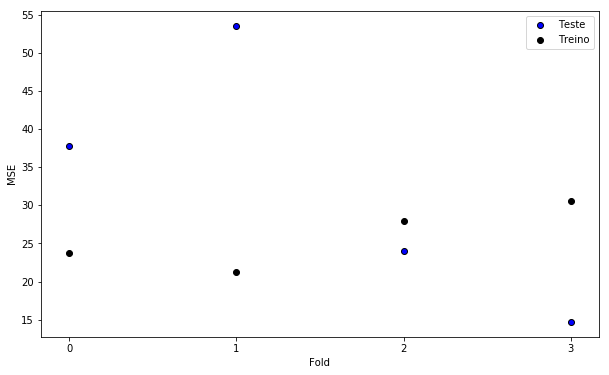

In [17]:
x = np.arange(0,len(media_mse_test),1)

plt.figure(figsize=(10,6))
plt.scatter(x,np.asarray(media_mse_test),edgecolor='black', c='blue', label='Teste')
#plt.plot(x,np.asarray(mse_test),ls='--')

plt.scatter(x,np.asarray(media_mse_train),edgecolor='black', c='black', label='Treino')
#plt.plot(x,np.asarray(mse_train),ls='--')
plt.ylabel('MSE')
plt.xlabel('Fold')

plt.xticks(np.arange(4))
plt.legend()
#plt.savefig('k-select', format='jpg',dpi = 300)
#plt.plot(x,np.asarray(mrse_test))
# k_min = 15

### Regressão para o melhor modelo

In [18]:
x_blindscale = scaler.transform(blind_test[['GR','RHOB','ILD_log10','NPHI']])

In [19]:
x_train = scaler.transform(dataset.loc[(k_folds_index[2][0])][['GR','RHOB','ILD_log10','NPHI']])
y_train = dataset.loc[(k_folds_index[2][0])]['DT']
RidReg = Ridge(alpha=1)
RidReg.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
blind_test['DT_Ridge'] = RidReg.predict(x_blindscale)

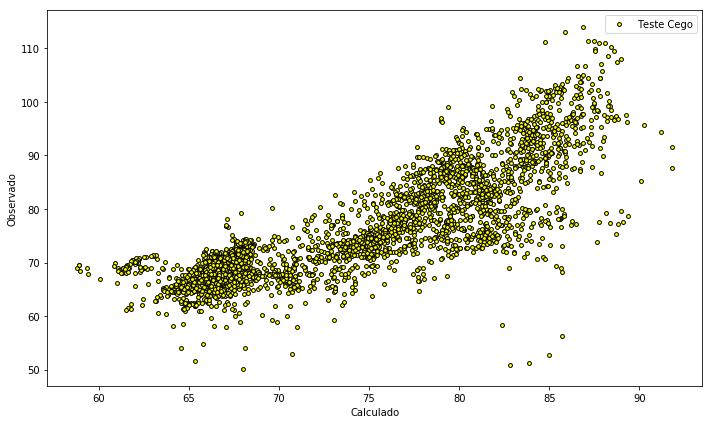

In [26]:
fig, axes = plt.subplots(figsize=(10,6))

axes.scatter(blind_test['DT_Ridge'], blind_test['DT'], edgecolor='black', c='yellow',s=15, label='Teste Cego')
    
axes.set_xlabel('Calculado')
axes.set_ylabel('Observado')
axes.legend()

fig.tight_layout()

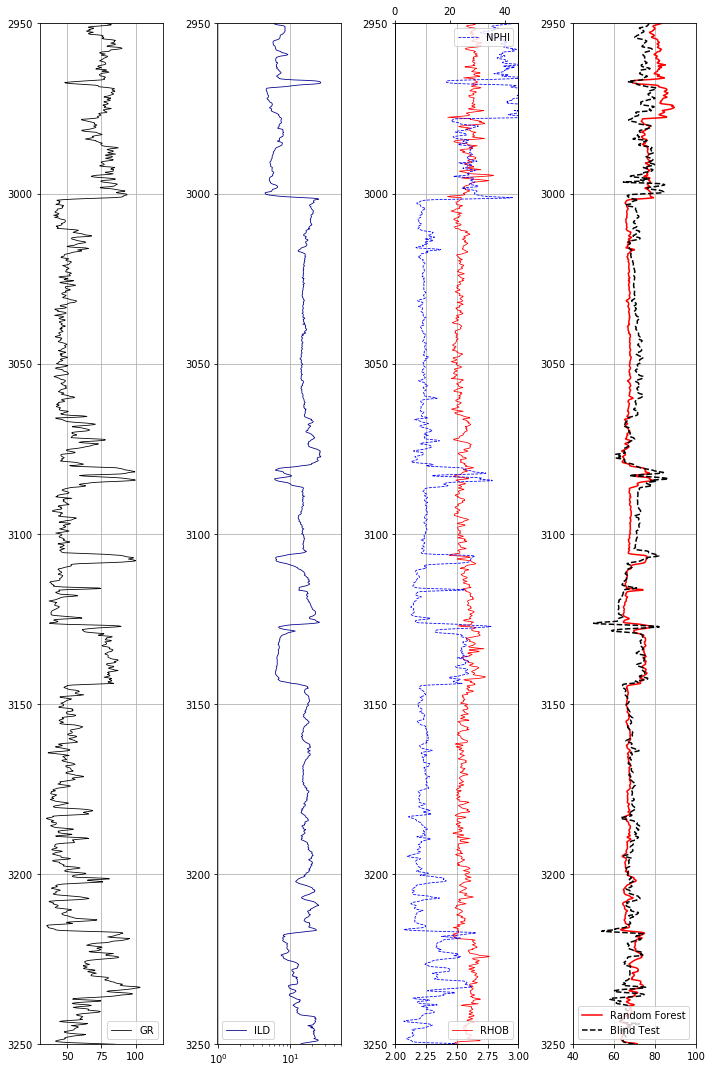

In [23]:
fig, axes = plt.subplots(ncols=4, figsize=(10,15))
axes2 = axes[2].twiny()

axes[0].plot(blind_test.GR, blind_test.DEPT, c='black', label='GR', lw=0.8)
axes[0].set_xlim(30,120)

axes[1].semilogx(blind_test.ILD,blind_test.DEPT, c = 'darkblue', lw=0.8, label='ILD')
axes[1].set_xlim(0,50)

axes[2].plot(blind_test.RHOB, blind_test.DEPT, c = 'red', label='RHOB', lw = 0.8)
axes[2].set_xlim(2,3)

axes2.plot(blind_test.NPHI, blind_test.DEPT, c = 'blue', label = 'NPHI', lw = 0.8, ls='--')
axes2.set_xlim(0,45)
axes2.legend(loc='upper right')
axes2.invert_yaxis()

axes[3].plot(blind_test.DT_Ridge.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values, 
          blind_test.DEPT.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values, c='red', label='Random Forest')

axes[3].plot(blind_test.DT.loc[(blind_test.DT > 0)].values, 
           blind_test.DEPT.loc[(blind_test.DT > 0)].values, c='black', label='Blind Test', ls='--')
axes[3].set_xlim(40,100)


for ax in axes:
    ax.set_ylim(2950,3250)
    ax.invert_yaxis()
    ax.grid()
    ax.legend()
    
axes[2].legend(loc='lower right')

fig.tight_layout()

In [29]:
blind_test.to_csv(r'C:/Users/mathe/Desktop/MATHEUS/UFBA/IC/shalegas-rad/blind_data.csv')